**UE 4268 - Examen 2023**

**`Noms:ADJESSE MONGO CAROLLE`**, 
`matricule: 17E2979` et `carolle.adjesse@facsciences-uy1.cm` 


Department of Physics - Faculty of Science - University of Yaoundé I

`Nom du Laboratoire: PHYSIQUE NUCLEAIRE ET RADIOPROTECTION`

`Date: 19-06-2023`

Le **2,5,8,11-tétrakis(4-(9H-carbazol-9-yl)phényle)-6,7-diisopropylnéryl-1,4,5,8,9,11-hexaazatriphénylène** ou 4CzIPN, est repertorié dans la base de donnée PubChem comme le composé 102198498.

Cette molécule présente des propriétés intéressantes pour les applications OLED en raison de sa haute efficacité lumineuse, de sa longue durée de vie et de sa stabilité thermique. Elle a été largement utilisée dans les écrans OLED pour les téléviseurs, les smartphones et les ordinateurs portables en raison de ses performances optimales et de sa faible consommation d'énergie.

1. A partir de site de [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498), donner, **dans votre cahier de composition**, sa formule moléculaire et son poids moléculaire.
2. Utiliser `rdkit.Chem.MolFromSmiles` et `rdkit.Chem.AllChem` pour représenter en 2D, y compris explicitement les atomes d'hydrogènes, la molécule 4CzIPN à partir de son SMILES isomérique, disponible sur [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498). 
3. Utiliser `rdkit.Chem.Descriptors` pour évaluer les propriétés physico-chimique suivantes de la molécule 4CzIPN : le poids moléculaire; poids moléculaire moyen de la molécule en ignorant les hydrogènes; logP ou solubilité, TPSA ou la polarité, nombre de liaisons donneurs d'hydrogènes  et nombre de liaisons accepteurs d'hydrogènes. Utiliser `pandas`pour présenter les résulats sous forme de tableau. **Noter les valeurs obtenues dans votre cahier de composition.**
4. Utiliser `rdkit.Chem.AllChem` et `rdkit.Chem.MolToXYZFile` pour écrire, à partir de `mol` (molécule rdkit) de la question 2. dans un fichier `"votre_nom_4CzIPN.xyz"`, les coordonnées au format xyz de la molécule 4CzIPN. 
   
   ```python
    rdkit.Chem.AllChem.EmbedMolecule(mol)
    rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    rdkit.Chem.MolToXYZFile(mol, 'votre_nom_4CzIPN.xyz')
    ```

5. Ouvrir le fichier créé et **noter dans votre cahier de composition, le chiffre se trouvant au début du fichier**. Ensuite l'effacer du fichier et sauvegarder celui-ci.
6. Utiliser `pyscf.gto` pour créer 
   
   ```python
   CzIPN_mol = pyscf.gto.M(atom=open('votre_nom_4CzIPN.xyz').read(),
    charge=0,
    spin=0,
    basis='631g*',
    unit='Angstrom')
    ```

    et par la méthode `CzIPN_mol.build().get_enuc()`, obtenir la valeur de l'énergie nucléaire de la molécule et **noter celle-ci dans votre cahier de composition**.
7. Le Hamiltonien 2-qubits de cette molécule est
\begin{equation*} \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X}) + h_6(\mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),
\end{equation*}
où les coefficients 
\begin{align*}
&h_1 = -0.46959492273396025,&&h_2 = -0.12480163590374627,\\
&h_3 = -0.026903253444563915,&&  h_4 = 0.004924575935052124,\\
&h_5 = -4.6840929608197336e-06,&& h_6 = - 4.683976972721447e-06.
\end{align*}
Utiliser, pour calculer l'état fondamental de la molécule 4CzIPN,
* `qiskit.opflow.operator_globals` et 
* `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

**Noter dans votre cahier de composition, la valeur propre et le vecteur propre de l'Hamiltonien**.

In [48]:
import rdkit
import pyscf
print(rdkit.__version__)
print(pyscf.__version__)

2023.03.1
2.2.1


In [49]:
import qiskit.tools.jupyter
%qiskit_version_table

## 2-) Representation en 2D

In [50]:
# Importation neccessaire
from rdkit import Chem

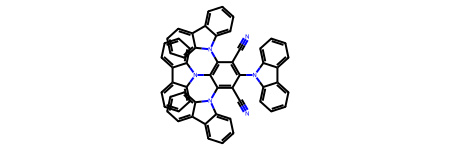

In [51]:
smi = 'C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4C#N)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)C#N'
m = Chem.MolFromSmiles(smi) # Convert smiles to molecule
m1c

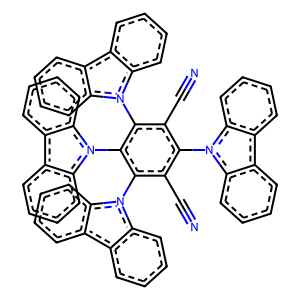

In [52]:
from rdkit import Chem
from rdkit.Chem import AllChem
from IPython.display import Image

# Création de l'objet molécule à partir du SMILES
mol = Chem.MolFromSmiles(smi)


# Génération de la représentation 2D de la molécule
img = Chem.Draw.MolToImage(mol, size=(300,300), kekulize=False)

# Affichage de l'image
display(img)

## 3) évaluer les propriétés physico-chimique de la molecule 

In [53]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# Chargement de la molécule à partir de sa structure SMILES
mol = Chem.MolFromSmiles('C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4C#N)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)C#N')

# Calcul des propriétés physico-chimiques
mw = Descriptors.MolWt(mol)  # Poids moléculaire
amw = Descriptors.HeavyAtomMolWt(mol)  # Poids moléculaire moyen sans les H
logp = Descriptors.MolLogP(mol)  # LogP (coefficient de partage octanol/eau)
tpsa = Descriptors.TPSA(mol)  # Surface totale de l'atome polaire
hbd = Descriptors.NumHDonors(mol)  # Nombre de liaisons donneurs d'hydrogènes
hba = Descriptors.NumHAcceptors(mol)  # Nombre de liaisons accepteurs d'hydrogènes

In [54]:
# Création d'un DataFrame
df = pd.DataFrame({
    'Propriété': ['Poids moléculaire', 'Poids moléculaire moyen sans les H', 'LogP', 'TPSA', 'Nombre de liaisons donneurs H', 'Nombre de liaisons accepteurs H'],
    'Valeur': [mw, amw, logp, tpsa, hbd, hba]
})

# Affichage du DataFrame
print(df)

                            Propriété     Valeur
0                   Poids moléculaire  788.91400
1  Poids moléculaire moyen sans les H  756.65800
2                                LogP   13.81836
3                                TPSA   67.30000
4       Nombre de liaisons donneurs H    0.00000
5     Nombre de liaisons accepteurs H    6.00000


## 4-) Creation du fichier 

In [57]:
from rdkit.Chem import AllChem

# Génération des coordonnées tridimensionnelles de la molécule
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol, maxIters=200)

# Écriture des coordonnées dans un fichier XYZ
Chem.MolToXYZFile(mol, 'ADJESSE_4CzIPN.xyz')

[13:37:58] Molecule does not have explicit Hs. Consider calling AddHs()
[13:37:58] Molecule does not have explicit Hs. Consider calling AddHs()


2-) 

In [68]:

    rdkit.Chem.AllChem.EmbedMolecule(mol)
    rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    rdkit.Chem.MolToXYZFile(mol, 'ADJESSE_nom_4CzIPN.xyz')

[13:50:56] Molecule does not have explicit Hs. Consider calling AddHs()
[13:50:57] Molecule does not have explicit Hs. Consider calling AddHs()


## 5-)  Ouvrir le fichier créé et **noter dans votre cahier de composition, le chiffre se trouvant au début du fichier**. Ensuite l'effacer du fichier et sauvegarder celui-ci.

In [69]:
with open('ADJESSE_4CzIPN.xyz', 'r') as file:
    lines = file.readlines()

num_atoms = int(lines[0]) # Convertit la première ligne en un entier

print(f"Le fichier contient {num_atoms} atomes.")

Le fichier contient 62 atomes.


In [61]:
with open('ADJESSE_4CzIPN.xyz', 'r') as file:
    lines = file.readlines()


In [62]:
with open('votre_nom_4CzIPN.xyz', 'w') as file:
    file.writelines(lines[1:])  # Supprime la première ligne

print('Le fichier a été sauvegardé sans le nombre d\'atomes au début.')

Le fichier a été sauvegardé sans le nombre d'atomes au début.


## 6. Utilisation de  `pyscf.gto` pour créer 
   
   ```python
   CzIPN_mol = pyscf.gto.M(atom=open('ADJESSE_4CzIPN.xyz').read(),
    charge=0,
    spin=0,
    basis='631g*',
    unit='Angstrom')
    ```

In [63]:
import pyscf

# Création de l'objet CzIPN_mol à partir du fichier XYZ
CzIPN_mol = pyscf.gto.M(
    atom=open('ADJESSE_4CzIPN.xyz').read(),  # Chemin vers le fichier XYZ
    charge=0,  # Charge de la molécule (0 pour une molécule neutre)
    spin=0,  # Nombre d'électrons non-appariés (0 pour une molécule fermée)
    basis='631g*',  # Type de base de calcul
    unit='Angstrom'  # Unité des coordonnées dans le fichier XYZ
)

IndexError: tuple index out of range

## 7-) Hamiltonien 2-Qubit

In [64]:
from qiskit.opflow import PauliSumOp, Z2Symmetries,TaperedPauliSumOp, operator_globals
from qiskit.algorithms import NumPyMinimumEigensolver

In [65]:
h1 = -0.46959492273396025
h2 = -0.12480163590374627
h3 = -0.026903253444563915
h4 = -0.026903253444563915
h5 = -4.6840929608197336e-06
h6 = - 4.683976972721447e-06


hamiltonian = PauliSumOp.from_list([
    ('II', h1),
    ('IZ', -h2),
    ('ZI', h2),
    ('ZZ', h3),
    ('XX', h4),
    ('IX', h5),
    ('XI', h5),
    ('XZ', h6),
    ('ZX', -h6)
])

In [66]:
solver = NumPyMinimumEigensolver()
result = solver.compute_minimum_eigenvalue(hamiltonian)
print(result.eigenvalue)

-0.6937406253605135


In [67]:
# Affichage de la valeur propre et du vecteur propre
print("La plus petite valeur propre est : ", np.real(result.eigenvalue))
print("Le vecteur propre correspondant est : ", np.real(result.eigenstate.to_matrix()))

La plus petite valeur propre est :  -0.6937406253605135
Le vecteur propre correspondant est :  [1.25090939e-06 4.23176574e-01 2.27399900e-02 1.25090939e-06]
